## Tutorial for Quasi Newton methods

Instructor: JaKeoung Koo @ Gachon University

The goal is to miminimze
$$f(x)=\frac 12 x^T Ax + b^T x$$

- $\nabla f(x)=Ax+b$
- $\nabla^2 f(x)=A$
- If $A$ is positive (semi)definite, the optimization problem is convex.
- In this case, the solution $\widehat{x}$ should satisfy $A\widehat x = -b$.


**Exercise 1.**

Verify that if $A=\begin{bmatrix}2&1\\1&2\end{bmatrix}$ and $b=(-1,-2)$, then the solution $\widehat x$ is given by $(0,1)$ and the optimal value $f(\widehat x)$ is -1.



**Line search**

Rather than using fixed step size, we can choose a step size, using a scheme called line search. There are many algorithms for line search.

Here, we use the simplest inexact line search method. We reduce the step size $\alpha$ by half until it satisfies the condition:
$$f(x - \alpha H^{-1} \nabla f(x)) < f(x)$$
where $H$ is the approximated Hessian.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SR1 Updates using Hessian
def sr1_method_hessian(A, b, x0, max_iter=10, tol=1e-6):
    x = np.array(x0)
    n = len(x)
    H = np.eye(n)  # Initial approximation of the Hessian
    f_vals = []

    for _ in range(max_iter):
        f = 0.5*np.dot(x.transpose(), np.dot(A, x)) + np.dot(b.transpose(), x)
        print(f"objective function value: {f}")

        f_vals.append(f)
        grad = A.dot(x) + b
        if np.linalg.norm(grad) < tol:
            break

        B = np.linalg.pinv(H)
        p = -np.dot(B, grad) # p: next step direction
        alpha = line_search(A, b, x, p)

        s = alpha * p # s=dx
        x_new = x + s
        y = (A.dot(x_new) + b) - grad

        if abs((y-H.dot(s)).dot(s)) >= tol:
            #----------------------------------------------------------
            # Exercise2
            # - Write your solution here for updating the Hessian
            # - Think about why inverse Hessian updates are more efficient
            #----------------------------------------------------------
            pass


        x = x_new

    return x, f_vals


# SR1 updates using inverse Hessian
def sr1_method_inv_hessian(A, b, x0, max_iter=10, tol=1e-6):
    x = np.array(x0)
    n = len(x)
    B = np.eye(n)  # Initial approximation of the inverse Hessian
    f_vals = []

    # eigvals = np.linalg.eigs(A)[0]

    for _ in range(max_iter):
        f = 0.5*np.dot(x.transpose(), np.dot(A, x)) + np.dot(b.transpose(), x)
        print(f"objective function value: {f}")

        f_vals.append(f)
        grad = A.dot(x) + b
        if np.linalg.norm(grad) < tol:
            break

        p = -np.dot(B, grad) # p: next step direction
        alpha = line_search(A, b, x, p)
        s = alpha * p # s=dx
        x_new = x + s
        y = (A.dot(x_new) + b) - grad

        if abs((s-B.dot(y)).dot(y)) >= tol:
            s_By = s - B.dot(y)
            B += np.outer(s_By, s_By) / s_By.dot(y)

        x = x_new

    return x, f_vals


def bfgs_method(A, b, x0, max_iter=10, tol=1e-6):
    x = np.array(x0)
    n = len(x)
    B = np.eye(n)  # Initial approximation of the inverse Hessian
    f_vals = []

    for _ in range(max_iter):
        f = 0.5*np.dot(x.transpose(), np.dot(A, x)) + np.dot(b.transpose(), x)
        print(f"objective function value: {f}")

        f_vals.append(f)

        grad = A.dot(x) + b
        if np.linalg.norm(grad) < tol:
            break

        p = -B.dot(grad)
        alpha = line_search(A, b, x, p)
        s = alpha * p
        x_new = x + s
        y = (A.dot(x_new) + b) - grad

        rho = 1.0 / np.dot(y, s)
        Isy = np.eye(n) - rho * np.outer(s, y)
        B = np.dot(Isy, np.dot(B, Isy.T)) + rho * np.outer(s, s)

        x = x_new

    return x, f_vals


def line_search(A, b, x, p):
    alpha = 1.0
    c = 0.5
    f0 = 0.5 * np.dot(x, np.dot(A, x)) + np.dot(b, x)
    g0 = np.dot(p, np.dot(A, x)) + np.dot(b, p)

    for k in range(20):
        f_next = 0.5 * np.dot((x + alpha * p), np.dot(A, (x + alpha * p))) + np.dot(b, (x + alpha * p))
        if f_next < f0:
            break

        alpha *= 0.5

    return alpha


# Define the objective function parameters A and b
A = np.array([[2, 1],
              [1, 2]])
b = np.array([-1, -2])
x0 = [10.0, 1.0]

# A = np.array([[2, 1, 0],
#               [1, 2, 0], [1, 1, 2]])
# b = np.array([-1, -2, 1])
# x0 = [10.0, 1.0, 1]

# Test the SR1 method
solution_sr1, f_vals_sr1 = sr1_method_inv_hessian(A, b, x0)
print("SR1 solution:", solution_sr1)

# Test the BFGS method
solution_bfgs, f_vals_bfgs = bfgs_method(A, b, x0)
print("BFGS solution:", solution_bfgs)

objective function value: 99.0
objective function value: 24.0
objective function value: -1.0
SR1 solution: [6.66133815e-16 1.00000000e+00]
objective function value: 99.0
objective function value: 24.0
objective function value: -0.94533527696793
objective function value: -0.9999567253670396
objective function value: -0.999999994420579
objective function value: -0.9999999999997338
objective function value: -1.0
BFGS solution: [1.28422823e-09 9.99999998e-01]


Text(0.5, 0, 'iteration')

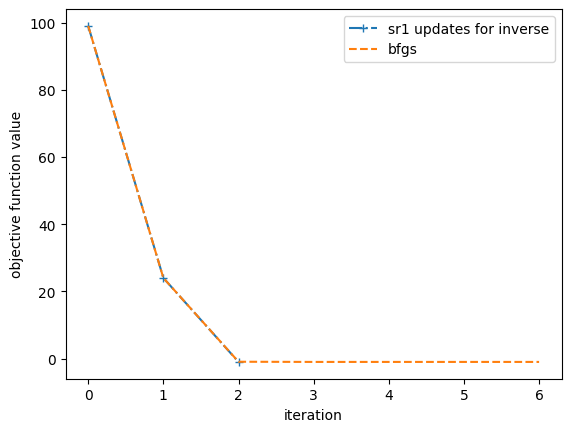

In [ ]:
plt.plot(f_vals_sr1, marker="+", linestyle="dashdot")
plt.plot(f_vals_bfgs, linestyle="dashed")
# plt.yscale("log")
plt.legend(["sr1 updates for inverse", "bfgs"])
plt.ylabel("objective function value")
plt.xlabel("iteration")